# **Tổng hợp kiến thức về mạng YOLO**

## **I. Introduction:**

Object Detection là một trong những đề tài quan trọng và phổ biến trong Computer Vision bởi tính ứng dụng cao, hiệu quả tốt. Mục tiêu của Object Detection là xác định và phân loại các vật thể trong ảnh, là một bài toán multi-task, thực hiện Classification và Regression (Localization) đồng thời.

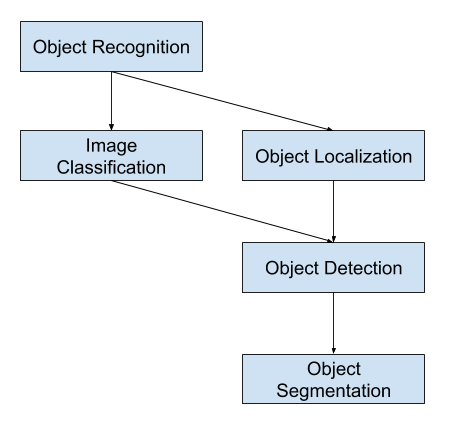

**Hình 1:** Sơ đồ các mối liên hệ giữa các tác vụ trong computer vision

Phương pháp chính dựa trên một mạng neural network duy nhất được huấn luyện dạng end-to-end model. Mô hình lấy input là một bức ảnh và dự đoán các bounding box. Do không sử dụng region proposal (k thuật được áp dụng họ model R-CNN) nên kỹ thuật này có độ chính xác thấp hơn, Nhưng lại cho ra kết quả rất nhanh với thời gian thực 45 fps thậm chí 155 fps. 

## **II. YOLO qua các version**

### **1. YOLOv1 Phương pháp 1 pha**

#### **a. Ý tưởng** 

Mô hình hoạt động bằng cách trước tiên đưa hình ảnh vào, tạo ra các feature map kích thước $S×S$, gọi là lưới các ô (grid of cells), trong đó mỗi ô chịu trách nhiệm dự đoán các bounding boxes nếu tâm của nó nằm trong ô. Mỗi grid cell (tức 1 ô bất kì nằm trong lưới ô) dự đoán $B$ bounding boxes, được xác định dựa trên tọa độ x, y (thông thường là tọa độ tâm, một số phiên bản là tọa độ góc trên cùng bên trái), xác xuất cho $C$ classes, chiều rộng (width),chiều cao (height) và độ tin cậy (confidence) về khả năng chứa vật thể bên trong. Độ tin cậy để xác định bên trong bouding box có tồn tại object hay khôn. Nếu trong bouding box đó không tồn tại object, ta bỏ luôn toàn bộ giá trị prediction khác của bouding box và classification, nhằm bỏ qua những nơi không tồn tại object. 

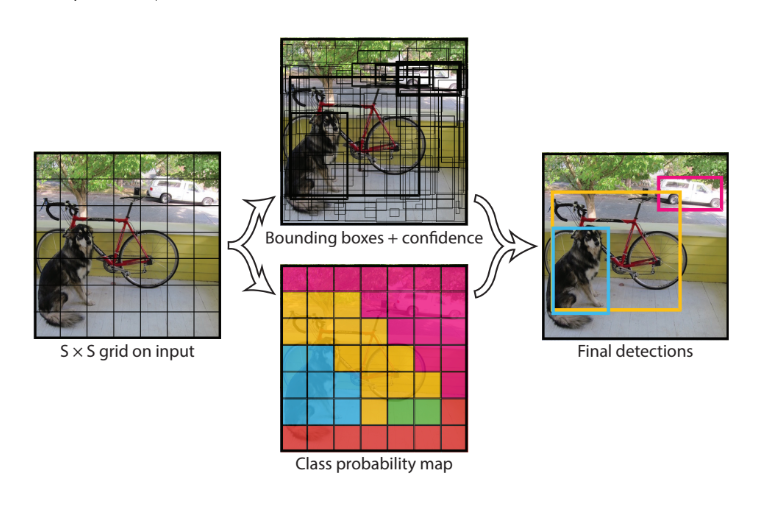

**Hình 5:** Các bước xử lý trong mô hình YOLO (hình ảnh trích xuất từ bài báo gốc). Đầu tiên mô hình chia hình ảnh thành một grid search kích thước $S×S$. Trên mỗi một grid cell ta dự báo một số lượng $B$ bounding boxes và confidence cho những boxes này và phân phối xác suất của $C$ classes. Như vậy output các dự báo là một tensor kích thước $S×S×(B×5+C)$. Giá trị 5 là các tham số của offsets của bounding box gồm $x,y,w,h$ và confidence. C là số lượng tham số của phân phối xác suất.

#### **b. Kiến trúc mạng**

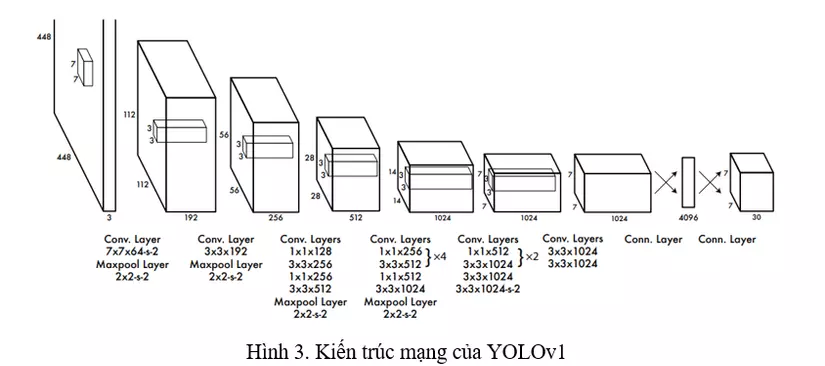

#### **c. Loss Function**

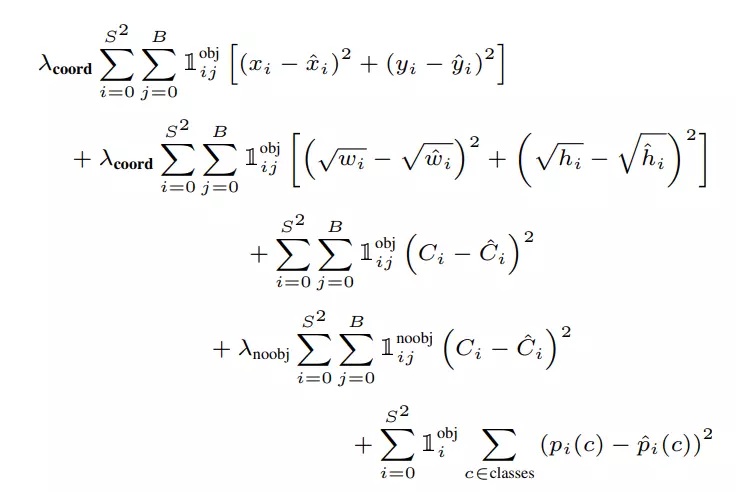

#### **d. Hạn chế của YOLOv1**
- YOLOv1 chỉ có thể predict được một object trong một cell, nếu có 2 object tồn tại trong cùng một cell, hoặc nếu phải predict từng object trong một nhóm object, YOLOv1 sẽ gặp rất nhiều khó khăn.
- Với việc chỉ sử dụng 2 Bounding Box, YOLOv1 sẽ gặp khó khăn với những object có tỉ lệ khác so với trong training.
- Regression Loss của YOLOv1 chưa tốt, dẫn đến việc đưa ra Bounding Box không tốt.

### **2. YOLOv2**

#### **a. Ý tưởng**

YOLOv1 gặp vấn đề về localization khá nhiều (Bouding box ko tốt), Recall của YOLOv1 cũng khá thấp. Trong YOLOv2 nhóm tác giả tập trung vào cải thiện 2 vấn đề này mà vẫn giữ nguyên độ chính xác tốt

Một số thay đổi về huấn luyện và kiến trúc đã được thực hiện, sử dụng batch normalization cho hàng loạt và hình ảnh đầu vào phân giải cao.

Giống như Faster R-CNN, mô hình YOLOv2 sử dụng anchor boxes, bounding box được xác định trước với hình dạng và kích thước hợp lý được tùy chỉnh trong quá trình huấn luyện. Sự lựa chọn các bounding boxes cho hình ảnh được xử lý trước bằng cách sử dụng thuật toán phân cụm k-mean trên tập dữ liệu huấn luyện.



Các predicted bouding box được tinh chỉnh để cho phép các thay đổi nhỏ có tác động ít hơn đến dự đoán, dẫn đến mô hình ổn định hơn  

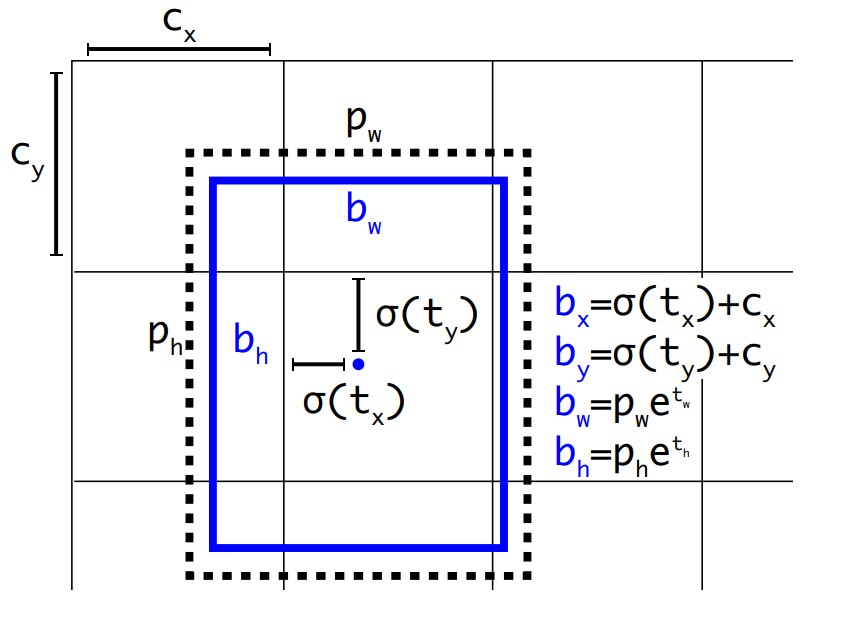

**Hình 6:** Sơ đồ giúp tạo prior bounding box có chiều rộng $p_w$ và chiều cao $p_h$ đã xác định từ grid cell có tọa độ $(c_x, c_y)$. Khi đó tọa độ tâm $(b_x,b_y)$ được tính theo mức độ tịnh tiến hàm sigmoid. Đồng thời, chiều rộng và chiều cao $(b_w,b_h)$ được tính như công thức scale số mũ của cơ số tự nhiên của $e$.

#### **b. Kiến trúc mạng**

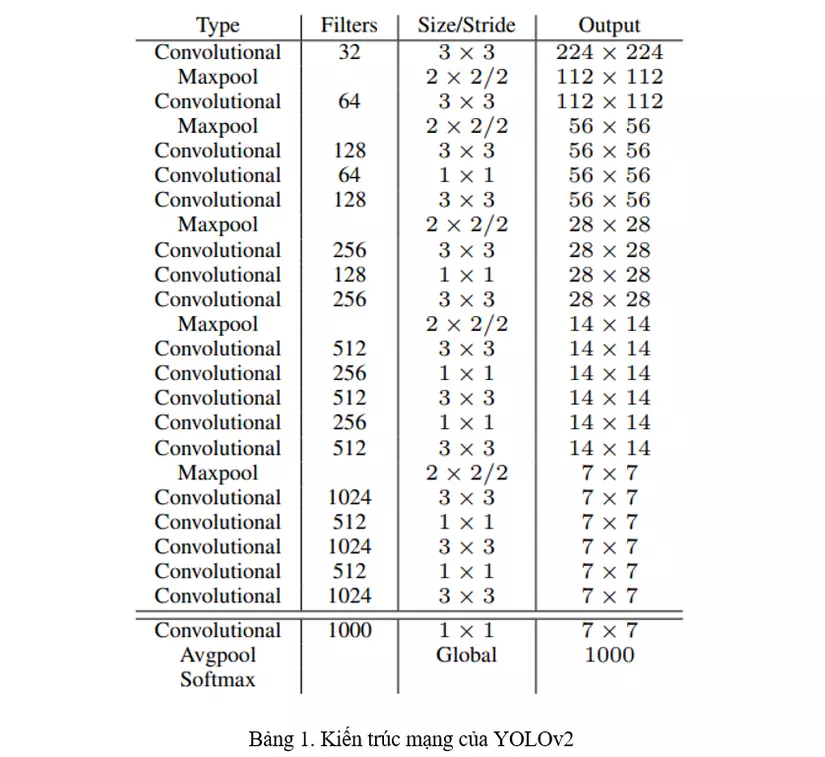

**Darknet-19** Kiến trúc mạng của YOLOv2 được thể hiện ở bảng 1, được gọi là Darknet-19 vì có 19 lớp Convolution (Conv). 

**Batch Norm**. Kiến trúc YOLOv2 thêm vào những lớp BatchNorm để việc training nhanh hơn và ổn định hơn. Dropout được loại bỏ khỏi model mà không sợ bị overfitting.

**High-res Classifier**. Backbone của YOLOv2 được pretrained trên ImageNet. Backbone trước tiên được finetune trên ImageNet với kích thước $448 × 448$ trong vòng 10 epochs, rồi mới chuyển sang Object Detection.

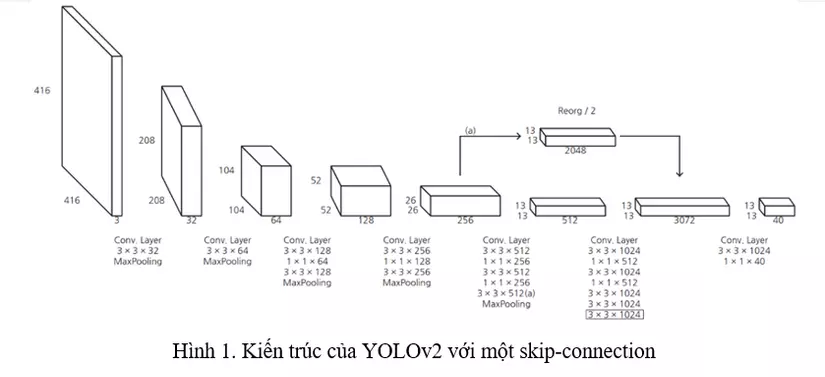

**Fine-grained Features**. Thay vì predict trên `7 x 7` grid feature map như YOLOv1 thì YOLOv7 predict trên một `13 x 13` grid feature map, việc này sẽ khiến YOLOv2 predict những object nhỏ tốt hơn. Sử dụng skip-connection để kết hợp thông tin từ feature map ở layer trước đó vào feature map cuối.

**Multi-scale training**. Trước đó YOLOv2 chỉ train với kích thước ảnh `448 x 448`. Sau khi áp dụng anchor box, YOLO đổi kích thước ảnh thành `416 x 416`. Muốn Detect tốt với nhiều kích thước ảnh đầu vào một lần. Kích thước ảnh đầu vào của YOLOv2 thay đổi với kích thước là bội số của 32, được lấy trong khoảng {320, 352,..., 608}.

**Những thay đổi khác**
**Áp dụng Anchor Box**. Kích thước ảnh đầu vào `416 x 416`. Sử dụng Anchor Box, YOLOv2 bị giảm 0.3 mAP nhưng Recall tăng lên. Có nghĩa YOLOv2 phát hiện được nhiều vật thể hơn, khả năng phát hiện chính xác lại kém đi.

Việc tối ưu vị trí bouding box từ Anchor Box: Model dự đoán độ dịch chuyển của Anchor Box gọi $t_x, t_y$ để sinh ra vị trí tâm Bouding Box $x, y$. YOLOc2 cũng vẫn dự đoán độ dịch chuyển $t_x, t_y, t_w, t_h$ và Objectness Score $t_0$, $t_x, t_y$ bị giới hạn giá trị của chúng trong khoảng [0,1], việc này giới hạn vị trí tâm $x, y$ không bị ra ngoài grid cell đó.

### **3. YOLOv3**

YOLOv3 là bản nâng cấp của YOLOv2 đồng thời giải thích những gì còn chưa rõ của YOLOv2.

#### **a. Kiến trúc mạng**

**Backbone**. Darknet 53

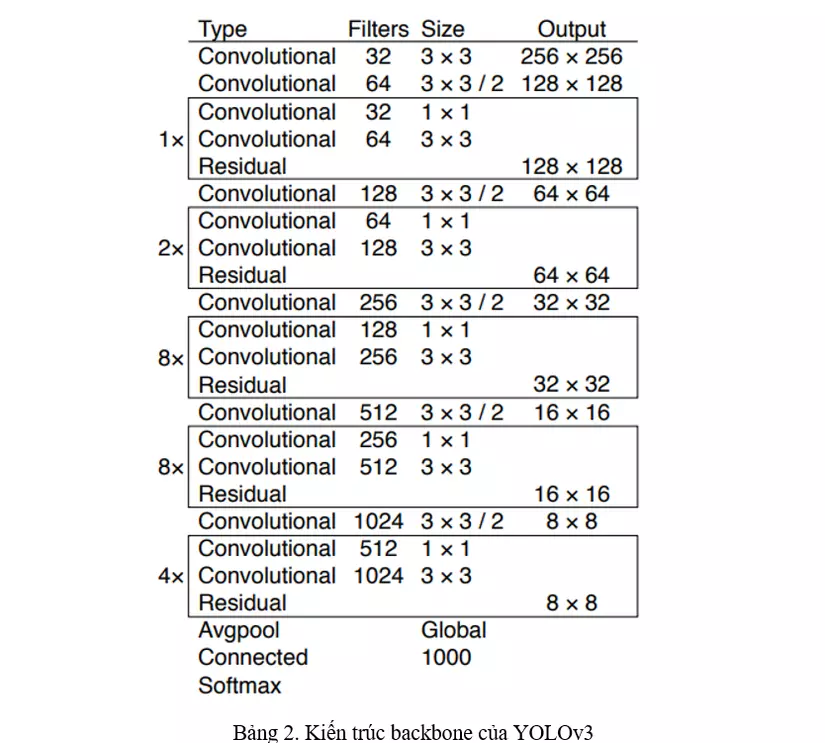

YOLOv3 thì áp dụng thêm skip-connection từ ResNet, gọi là một Residual Block

Các phiên bản YOLO trước, phát hiện vật thể nhỏ luôn là một điểm yếu. YOLOv3 áp dụng Feature Pyramid Network, thực hiện phát hiện object ở 3 scale khác nhau của feature map.

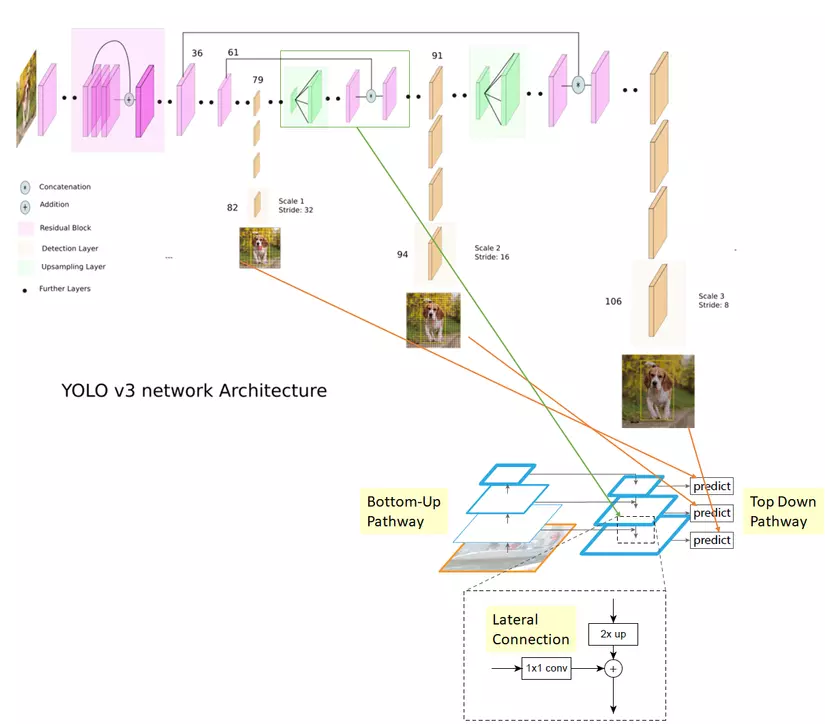

**Những thay đổi khác**

Vetor dự đoán $t_x, t_y, t_w, t_h, t_o, y_1,...y_C$ với C là tổng số class.

**Classification prediction.** YOLOv3 sử dụng hàm sigmoid thay vì hàm softmax ở output classification. Bởi vì một số bộ Dataset thì một object có thể phân thành 2 class (vd class person và women)

**Bounding box prediction** Giữ nguyên ý tưởng Anchor Box với k-means. YOLOv3 tạo ra 9 anchors box, vơi mỗi scale sẽ có 3 anchors box.

**Refferences:**
1. https://phamdinhkhanh.github.io/2019/09/29/OverviewObjectDetection.html
2. https://viblo.asia/p/tong-hop-kien-thuc-tu-yolov1-den-yolov5-phan-2-V3m5WRDblO7